<a href="https://colab.research.google.com/github/pratikchaudhari64/notebooks/blob/main/pytorch_and_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)


100%|██████████| 26.4M/26.4M [00:01<00:00, 17.5MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 308kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.59MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.70MB/s]


In [55]:
input_image = torch.randn(3,28,28)
print(input_image.size())
# input_image
training_data.data.size()

torch.Size([3, 28, 28])


torch.Size([60000, 28, 28])

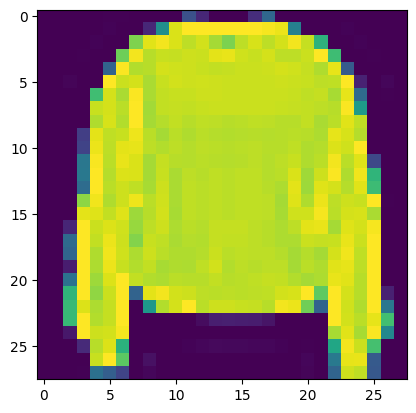

In [64]:

# Permute the dimensions
image_to_display = input_image.permute(1, 2, 0)

# Display the image
plt.imshow(training_data.data[7])
plt.show()

In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())